# Chapter 17: Regression-Based Forecasting


> (c) 2019-2020 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.
>
> Date: 2020-03-08
>
> Python Version: 3.8.2
> Jupyter Notebook Version: 5.6.1
>
> Packages:
>   - dmba: 0.0.12
>   - matplotlib: 3.2.0
>   - numpy: 1.18.1
>   - pandas: 1.0.1
>   - statsmodels: 0.11.1
>
> The assistance from Mr. Kuber Deokar and Ms. Anuja Kulkarni in preparing these solutions is gratefully acknowledged.


In [1]:
# import required packages for this chapter
from pathlib import Path
import warnings

import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

from dmba import regressionSummary

import matplotlib.pylab as plt

%matplotlib inline

In [2]:
# Working directory:
#
# We assume that data are kept in the same directory as the notebook. If you keep your 
# data in a different folder, replace the argument of the `Path`
DATA = Path('.')
# and then load data using 
#
# pd.read_csv(DATA / ‘filename.csv’)

# Problem 17.1: Impact of September 11 on Air Travel in the United States
The Research and Innovative Technology Administration's Bureau of Transportation Statistics conducted a study to evaluate the impact of the September 11, 2001 terrorist attack on US transportation.  The 2006 study report and the data can be found at https://www.bts.gov/archive/publications/estimated_impacts_of_9_11_on_us_travel/index. The goal of the study was stated as follows:

> The purpose of this study is to provide a greater understanding of the passenger travel behavior patterns of persons making long distance trips before and after 9/11.

The report analyzes monthly passenger movement data between January 1990 and May 2004. Data on three monthly time series are given in file _Sept11Travel.csv_ for this period: 

1. Actual airline revenue passenger miles (Air), 
2. Rail passenger miles (Rail), and 
3. Vehicle miles traveled (Car).

In order to assess the impact of September 11, BTS took the following approach: using data before September 11, they forecasted future data (under the assumption of no terrorist attack). Then, they compared the forecasted series with the actual data to assess the impact of the event. Our first step, therefore, is to split each of the time series into two parts: pre- and post September 11. We now concentrate only on the earlier time series.

## Solution 17.1.a
Plot the pre-event AIR time series. What time series components appear?

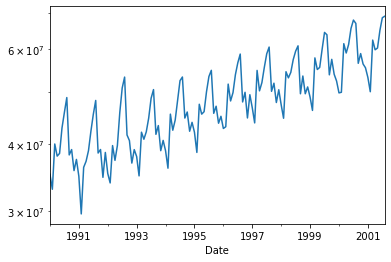

In [3]:
df = pd.read_csv(DATA / 'Sept11Travel.csv')

# convert the date information to a datetime object
df['Date'] = pd.to_datetime(df.Month, format='%b-%y')

air_ts = pd.Series(df['Air RPM (000s)'].values, index=df.Date, name='Air')
pre_air_ts = air_ts[:'2001-08-31']
post_air_ts = air_ts['2001-08-31':]

rail_ts = pd.Series(df['Rail PM'].values, index=df.Date, name='Rail')
pre_rail_ts = rail_ts[:'2001-08-31']
post_rail_ts = rail_ts['2001-08-31':]

car_ts = pd.Series(df['VMT (billions)'].values, index=df.Date, name='Car')
pre_car_ts = car_ts[:'2001-08-31']
post_car_ts = car_ts['2001-08-31':]

ax = pre_air_ts.plot()
ax.set_yscale('log')
plt.show()

From the time plot we can say that the following components appear in the 
given time series:

Level, trend, seasonality and noise.

## Solution 17.1.b
The Figure in the book shows a time plot of the __seasonally adjusted__ pre-September-11 AIR series.
Which of the following methods would be adequate for forecasting the series shown in the figure?

- Linear regression model seasonality
- Linear regression model with trend
- Linear regression model with trend and seasonality


- Linear regression model seasonality - NO
- Linear regression model with trend - YES
- Linear regression model with trend and seasonality - NO

## Solution 17.1.c
Specify a linear regression model for the AIR series that would produce a seasonally adjusted series similar to the Figure shown in the book, with multiplicative seasonality. What is the outcome variable? What are the predictors?

- Outcome variable = log Y
- Predictor = 11 dummies, for 11 of the 12 months (one reference category)


## Solution 17.1.d
Run the regression model from (c). Remember to
use only pre-event data.

In [4]:
pre_air_df = tsatools.add_trend(pre_air_ts, trend='ct')
pre_air_df['Month'] = pre_air_df.index.month

lm_ts = sm.ols(formula='np.log(Air) ~ C(Month)', data=pre_air_df).fit()
lm_ts.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(Air)   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     5.515
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           3.60e-07
Time:                        20:21:12   Log-Likelihood:                 68.335
No. Observations:                 140   AIC:                            -112.7
Df Residuals:                     128   BIC:                            -77.37
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         17.5598      0.045    391.626      0.000      17.471      17.649
C(Month)[T.2]     -0.0616      0.063     -0.971      0.333      -0.187       0.064
C(Month)[T.3]      0.1410      0.063      2.224      0.028       0.016       0.267
C(Month)[T.4]      0.0955      0.063      1.507      0.134      -0.030       0.221
C(Month)[T.5]      0.1250      0.063      1.971      0.051      -0.001       0.250
C(Month)[T.6]      0.2064      0.063      3.254      0.001       0.081       0.332
C(Month)[T.7]      0.2717      0.063      4.285      0.000       0.146       0.397
C(Month)[T.8]      0.2983      0.063      4.704      0.000       0.173       0.424
C(Month)[T.9]      0.0803      0.065      1.239      0.218      -0.048       0.209
C(Month)[T.10]     0.1137      0.065      1.753      0.082      -0.015       0.242
C(Month)[T.11]     0.0280      0.065      0.432      0.666      -0.100       0.156
C(Month)[T.12]     0.0699      0.065      1.078      0.283      -0.058       0.198
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.596
Skew:                           0.010   Prob(JB):                       0.0136
Kurtosis:                       1.786   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

check the Estimate for Season2 (Feb), -0.600 means Feb numbers (on an average)
are less than Jan and positive estimates for all other seasons means they are 
more than Jan.

### Solution 17.1.d.i
What can we learn from the statistical insignificance of the coefficients for October and September?

We learn that the apparently positive seasonal effect for Sep. (P-value=0.218)
is not statistically significant. However, it is statistically significant for 
October (P-value=0.082). 


### Solution 17.1.d.ii
The actual value of AIR (air revenue passenger miles) in January 1990 was 35.153577 billion. What is the residual for this month, using the regression model? Report the residual in terms of air revenue passenger miles.

In [5]:
# Note that the model predicts the logarithm of the outcome, we need to `exp` it
predicted = np.exp(lm_ts.predict(pre_air_df))[0]
actual = pre_air_ts[0]
print('Predicted for Jan 1990   :', predicted)
print('Actual value for Jan 1990:', actual)
residual = actual - predicted
print('Residual for Jan 1990    :', residual)

Predicted for Jan 1990   : 42278658.58950092
Actual value for Jan 1990: 35153577
Residual for Jan 1990    : -7125081.589500919


# Solution 17.1.e
Create an ACF (autocorrelation) plot of the regression residuals.

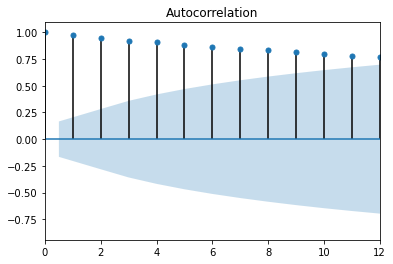

In [6]:
fig = tsaplots.plot_acf(lm_ts.resid)
fig.axes[0].set_xlim(0, 12)
plt.show()

### Solution 17.1.e.i
What does the ACF plot tell us about the regression model's forecasts?

The positive autocorrelation at many lags tells us that the forecast errors
from this model are positively correlated. If we over-predict in a certain 
month, we are likely to over-predict the following month as well.


### Solution 17.1.e.ii
How can this information be used to improve the model?

By creating a second-level where we model the residuals using an AR model. 
(Alternatively, by incorporating lagged periods as predictors, within an ARIMA model).

### Solution 17.1.f
Fit linear regression models to Air, Rail, and to Car with additive seasonality and an appropriate trend. For Air and Car, fit a linear trend. For Rail, use a quadratic trend. Remember to use only pre-event data. Once the models are estimated, use them to forecast each of the three post-event series.

In [7]:
air_df = tsatools.add_trend(air_ts, trend='ct')
air_df['Month'] = air_df.index.month
rail_df = tsatools.add_trend(rail_ts, trend='ct')
rail_df['Month'] = rail_df.index.month
car_df = tsatools.add_trend(car_ts, trend='ct')
car_df['Month'] = car_df.index.month

air_lm = sm.ols(formula='Air ~ trend + C(Month)', data=air_df[:'2001-01-01']).fit()
rail_lm = sm.ols(formula='Rail ~ trend + np.square(trend) + C(Month)', data=rail_df[:'2001-01-01']).fit()
car_lm = sm.ols(formula='Car ~ trend + C(Month)', data=car_df[:'2001-01-01']).fit()

### Solution 17.1.f.i
For each series (Air, Rail, Auto), plot the complete pre-event and post-event actual series overlayed with the predicted series.

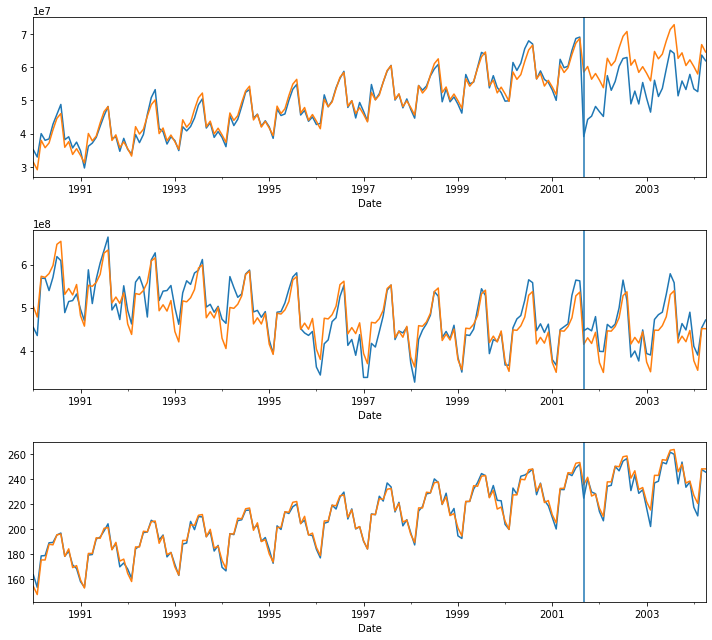

In [8]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,9))
    air_ts.plot(ax=axes[0])
    air_lm.predict(air_df).plot(ax=axes[0])
    rail_ts.plot(ax=axes[1])
    rail_lm.predict(rail_df).plot(ax=axes[1])
    car_ts.plot(ax=axes[2])
    car_lm.predict(car_df).plot(ax=axes[2])
    axes[0].axvline(x='2001-09-11')
    axes[1].axvline(x='2001-09-11')
    axes[2].axvline(x='2001-09-11')
plt.tight_layout()
plt.show()

### Solution 17.1.f.ii
What can be said about the effect of the September 11 terrorist attack on the three modes of transportation? Discuss the magnitude of the effect, its time span, and any other relevant aspects.


For Rail and Auto, there is hardly any change. For Air, there is an immediate 
drop after Sept 11, 2001 of approximately 30%, a modest portion of which is 
recovered by spring of 2002.

# Problem 17.2: Analysis of Canadian Manufacturing Workers Workhours
The time plot (see book) describes the average annual number of weekly hours spent by Canadian manufacturing workers (data are available in _CanadianWorkHours.csv_, data courtesy of Ken Black).

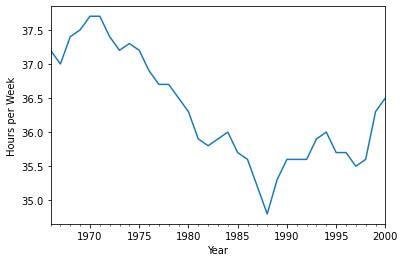

In [9]:
df = pd.read_csv(DATA / 'CanadianWorkHours.csv')
df_ts = pd.Series(df['Hours'].values, index=pd.to_datetime(df.Year, format='%Y'), name='shipments')
ax = df_ts.plot()
ax.set_ylabel('Hours per Week')

plt.show()

## Solution 17.2.a
Which of the following regression models would fit the series best? (Choose one.)

- Linear trend model
- Linear trend model with seasonality
- Quadratic trend model
- Quadratic trend model with seasonality

Of the four options, the *quadratic trend model* would fit the series best.

## Solution 17.2.b
If we computed the autocorrelation of this series, would the lag-1 autocorrelation exhibit negative, positive, or no autocorrelation? How can you see this from the plot?

Positive autocorrelation - each succeeding value in the series stays fairly close to the previous value.


## Solution 17.2.c
Compute the autocorrelation of the series and produce an ACF plot. Verify your answer to the previous question.

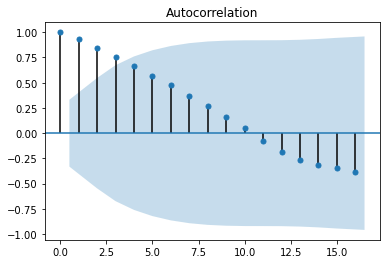

In [10]:
tsaplots.plot_acf(df_ts)
plt.show()

# Problem 17.3:  Toys "R" Us Revenues
The Figure is a time plot of the quarterly revenues of Toys "R" Us between 1992 and 1995 (thanks to Chris Albright for suggesting the use of these data, which are available in _ToysRUsRevenues.csv_).

In [11]:
df = pd.read_csv(DATA / 'ToysRUsRevenues.csv')
for q, m in ('Q1', '03'), ('Q2', '06'), ('Q3', '09'), ('Q4', '12'):
    df['QuarterYear'] = df['QuarterYear'].str.replace(q, m)
df['Date'] = pd.to_datetime(df.QuarterYear, format='%m-%y')
df_ts = pd.Series(df['Revenue(in million $)'].values, index=df.Date, name='Revenue')

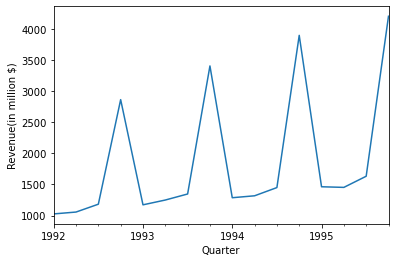

In [12]:
ax = df_ts.plot()
ax.set_xlabel('Quarter')
ax.set_ylabel('Revenue(in million $)')
plt.show()

## Solution 17.3.a
Fit a regression model with a linear trend and additive seasonality. Use the entire series (excluding the last two quarters) as the training set.

## Solution 17.3.b
A partial output of the regression model is shown in this Table (where `C(Quarter)[T.2]` is the Quarter 2 dummy).

In [13]:
df = tsatools.add_trend(df_ts, trend='ct')
df['Quarter'] = df.index.quarter

train_df = df[:-2]
valid_df = df[-2:]

lm = sm.ols(formula='Revenue ~ trend + C(Quarter)', data=train_df).fit()
print(pd.DataFrame({'coef': lm.params, 'std err': lm.bse}))

# warning expected
print(lm.summary())

                        coef     std err
Intercept         906.750000  115.346119
C(Quarter)[T.2]   -15.107143  119.659603
C(Quarter)[T.3]    89.166667  128.673983
C(Quarter)[T.4]  2101.726190  129.165419
trend              47.107143   11.256629
                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     97.18
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           2.13e-07
Time:                        20:21:13   Log-Likelihood:                -88.547
No. Observations:                  14   AIC:                             187.1
Df Residuals:                       9   BIC:                             190.3
Df Model:                           4                                         
Covariance Type:            nonrobust      

/Users/gedeck/opt/anaconda3/envs/dmba-notebooks/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
regressionSummary(valid_df['Revenue'], lm.predict(valid_df))


Regression statistics

                      Mean Error (ME) : 183.1429
       Root Mean Squared Error (RMSE) : 313.6820
            Mean Absolute Error (MAE) : 254.6667
          Mean Percentage Error (MPE) : 3.0194
Mean Absolute Percentage Error (MAPE) : 7.4047


Use this output to answer the following questions:

### Solution 17.3.b.i
Which two statistics (and their values)  measure how well this model fits the training data?

The multiple R-squared (0.98) indicates what portion of the overall variation 
is explained by the regression, and the RMS Error (314) gives an idea of the
magnitude of the typical error (regardless of direction).

### Solution 17.3.b.ii
Which two statistics (and their values) measure the predictive accuracy of this model?


The RMS error (314) gives an idea of the magnitude of the typical error, and 
the Mean Error (183) an idea of the overall average error (with errors in one
direction netting out errors in the other).

### Solution 17.3.b.iii
After adjusting for trend, what is the average difference between sales in Q3 and sales in Q1?

In [15]:
q3q1_differences = (df_ts[2:].values - df_ts[:-2].values)[[0, 4, 8, 12]]
print('Differences: ', q3q1_differences)
print('mean difference: ', q3q1_differences.mean())

Differences:  [156 174 163 169]
mean difference:  165.5


The actual Q3-Q1 differences are 156+174+163+169, the average is 165.5. \\$94 
million of this is actually trend (the coefficient for trend is \\$47 million, 
so two quarter's worth is \\$94 million), leaving \\$71 million as the average 
Q3-Q1 difference after adjusting for trend .


### Solution 17.3.b.iv
After adjusting for seasonality, which quarter ($Q_1, Q_2, Q_3$, or $Q_4$) has the highest average sales?

After adjusting for seasonality, you are left with trend, and the trend is for
increasing sales. Therefore, Q4, the last quarter, will have the highest 
average sales.

# Problem 17.4: Walmart Stock
The Figure shows the series of Walmart daily closing prices between February 2001 and February 2002 (Thanks to Chris Albright for suggesting the use of these data, which are publicly available, for example, at http://finance.yahoo.com and are in the file _WalMartStock.csv_). 

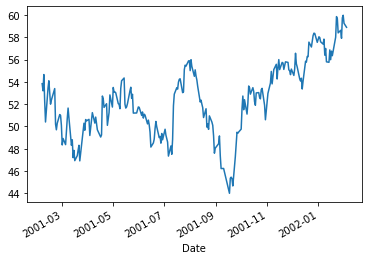

In [16]:
df = pd.read_csv(DATA / 'WalMartStock.csv')
ts = pd.Series(df['Close'].values, index=pd.to_datetime(df.Date, format='%d-%b-%y'), name='Walmart')
ts.plot()
plt.show()

## Solution 17.4.a
Fit an AR(1) model to the close price series. Report the coefficient table.

In [17]:
# warning expected
ARIMA(ts, order=(1, 0, 0)).fit(disp=0).summary()

/Users/gedeck/opt/anaconda3/envs/dmba-notebooks/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Walmart   No. Observations:                  248
Model:                     ARMA(1, 0)   Log Likelihood                -349.796
Method:                       css-mle   S.D. of innovations              0.987
Date:                Sun, 08 Mar 2020   AIC                            705.593
Time:                        20:21:13   BIC                            716.133
Sample:                             0   HQIC                           709.836
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            52.9511      1.328     39.863      0.000      50.348      55.555
ar.L1.Walmart     0.9558      0.019     51.090      0.000       0.919       0.993
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0462           +0.0000j            1.0462            0.0000
-----------------------------------------------------------------------------
"""

## Solution 17.4.b
Which of the following is/are relevant for testing whether this stock is a random walk? 

- The autocorrelations of the close prices series
- The AR(1) slope coefficient
- The AR(1) constant coefficient


- The autocorrelations of the close prices series - NO
- The AR(1) slope coefficient - YES
- The AR(1) constant coefficient - NO

## Solution 17.4.c
Does the AR model indicate that this is a random walk? Explain how you reached your conclusion.

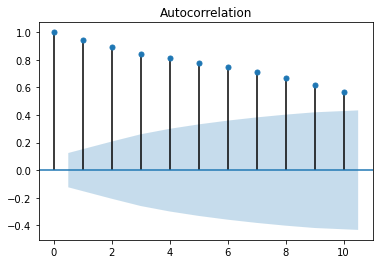

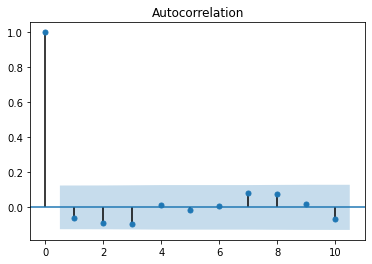

In [18]:
tsaplots.plot_acf(ts, lags=10)
tsaplots.plot_acf(np.diff(ts), lags=10)
plt.show()


First, note that the ACF plot indicates no substantial autocorrelation for the differences.
Fitting an AR(1) model to the close price series yields a slope coefficient of 0.956 with 
standard error 0.019. The slope coefficient is 2.3 standard errors away from the value 1. 
At a 5% significance level we'd say that this is not a random walk, but at 1% it is. 
In conclusion, the series appears to be close to a random walk.

## Solution 17.4.d
What are the implications of finding that a time-series is a
random walk? Choose the correct statement(s) below. 

- It is impossible to obtain forecasts that are more accurate than naive forecasts for the series
- The series is random
- The changes in the series from one period to the next are random


- It is impossible to obtain forecasts that are more accurate than naive forecasts for the series - YES (except for the naive prediction that yesterday's price is a good predictor of today's)
- The series is random - NO (there is an underlying value around which there is noise (errors))
- The changes in the series from one period to the next are random - YES


# Problem 17.5: Department Store Sales
The time plot in the Figure describes actual quarterly sales for a department store over a 6-year period (data are available in _DepartmentStoreSales.csv_, data courtesy of Chris Albright).

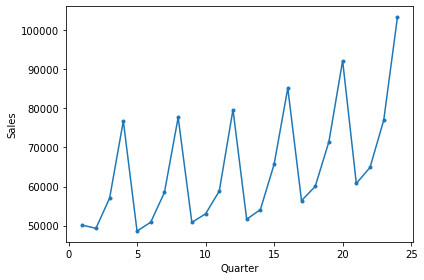

In [19]:
df = pd.read_csv(DATA / 'DepartmentStoreSales.csv')
df_ts = pd.Series(df['Sales'].values, index=df.Quarter, name='Sales')
ax = df_ts.plot(style='.-')
ax.set_ylabel('Sales')
plt.tight_layout()
plt.show()

## Solution 17.5.a
The forecaster decided that there is an exponential trend in the
series. In order to fit a regression-based model that accounts for this
trend, which of the following operations must be performed?  

- Take log of quarter index
- Take log of sales
- Take an exponent of sales
- Take an exponent of quarter index


- Take log of quarter index - NO
- Take log of sales - YES
- Take an exponent of sales - NO
- Take an exponent of quarter index - NO

## Solution 17.5.b
Fit a regression model with an exponential trend and seasonality, using the first 20 quarters as the training data (remember to first partition the series into training and validation series).

In [20]:
df = tsatools.add_trend(df_ts, trend='ct')
df['Quarter'] = [f'Q{(idx-1) % 4 + 1}' for idx in df.index]

train_df = df[:20]
valid_df = df[20:]

lm_expo = sm.ols(formula='np.log(Sales) ~ trend + Quarter', data=df[:20]).fit()

## Solution 17.5.c
A partial output is shown in the Table. 
From the output, after adjusting for trend, are Q2 average sales higher, lower, or approximately equal to the average Q1 sales?

In [21]:
print(lm_expo.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(Sales)   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     175.9
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           2.08e-12
Time:                        20:21:14   Log-Likelihood:                 42.865
No. Observations:                  20   AIC:                            -75.73
Df Residuals:                      15   BIC:                            -70.75
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.7489      0.019    574.057

Coefficient of the Q_2 is 0.024, which is very low close to 0%. This implies
that an average sale of Q2 is approximately equal to the average Q1 sales.
Approximately equal (p-value is insignificant)

## Solution 17.5.d
Use this model to forecast sales in quarters 21 and 22.

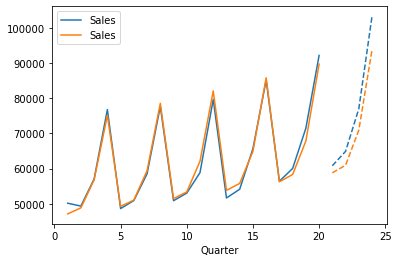

In [22]:
predict_lm_expo = np.exp(lm_expo.predict(train_df))
ax = train_df.plot(y='Sales')
predict_lm_expo.plot(ax=ax)
valid_df.plot(ax=ax, y='Sales', color='C0', linestyle='dashed')
np.exp(lm_expo.predict(valid_df)).plot(ax=ax, y='Sales', color='C1', linestyle='dashed')
plt.show()

Predictions for quarters 21 and 22

In [23]:
np.exp(lm_expo.predict(valid_df))[:2]

Quarter
21    58793.709570
22    60951.509541
dtype: float64

In [24]:
regressionSummary(valid_df['Sales'][:2], np.exp(lm_expo.predict(valid_df))[:2])


Regression statistics

                      Mean Error (ME) : 2977.3904
       Root Mean Squared Error (RMSE) : 3131.7550
            Mean Absolute Error (MAE) : 2977.3904
          Mean Percentage Error (MPE) : 4.6919
Mean Absolute Percentage Error (MAPE) : 4.6919


## Solution 17.5.e
The plots in the Figure describe the fit (top) and forecast errors (bottom) from this regression model.

### Solution 17.5.e.i
Recreate these plots.

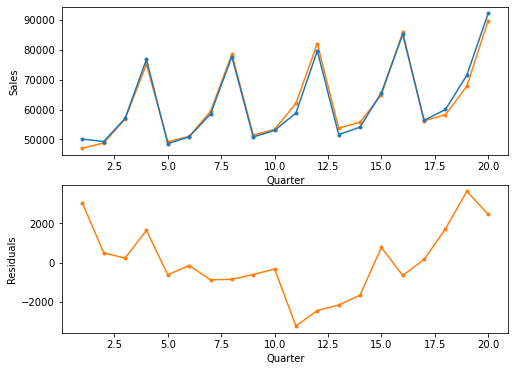

In [25]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,6))
    np.exp(lm_expo.predict(df[:20])).plot(ax=axes[0], color='C1', style='.-')
    resid = df[:20].Sales - np.exp(lm_expo.predict(df[:20]))
    resid.plot(ax=axes[1], color='C1', style='.-')
    df[:20].Sales.plot(ax=axes[0], color='C0', style='.-')

    axes[0].set_ylabel('Sales')
    axes[1].set_ylabel('Residuals')

    plt.show()

### Solution 17.5.e.ii
Based on these plots, what can you say about your forecasts for quarters 21 and 22? Are they likely to over-forecast, under-forecast, or be reasonably close to the real sales values?

Based on the U-shape of the residual plot, at Q20, you would expect Q21 and 
Q22 estimates to be too low (actual - forecast > 0). If we look at the actual 
data (below), it turns out that the predictions were indeed too low, 
indicating that the fitted exponential trend is inadequate.
From the above estimates for Q21 and Q22 we can see that the predicted 
forecast values for quarter 21 and 22 are below the actual values.

In [26]:
valid_df['Sales'][:2]

Quarter
21    60800
22    64900
Name: Sales, dtype: int64

## Solution 17.5.f
From the forecast errors plot, which of the following statements appear true? 

- Seasonality is not captured well
- The regression model fits the data well
- The trend in the data is not captured well by the model


- Seasonality is not captured well - NO
- The regression model fits the data well - NO
- The trend in the data is not captured well by the model - YES


## Solution 17.5.g
Which of the following solutions is adequate _and_ a parsimonious solution for improving model fit? 

- Fit a quadratic trend model to the residuals (with Quarter and Quarter$^2$)
- Fit an AR model to the residuals
- Fit a quadratic trend model to Sales (with Quarter and Quarter$^2$)


- Fit a quadratic trend model to the residuals (with Quarter and Quarter$^2$) - NO
- Fit an AR model to the residuals - NO
- Fit a quadratic trend model to Sales (with Quarter and Quarter$^2$) - YES

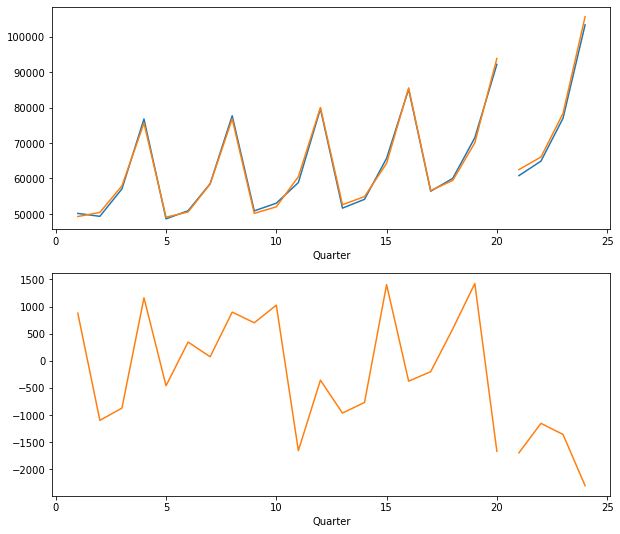

In [27]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    lm_quadratic = sm.ols(formula='np.log(Sales) ~ trend + np.square(trend) + Quarter', data=df[:20]).fit()
    predict_lm_quadratic = np.exp(lm_quadratic.predict(df))
    # ax = df_ts.plot()
    # predict_lm_quadratic.plot(ax=ax)

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,9))
    df[:20].Sales.plot(ax=axes[0], color='C0')
    np.exp(lm_quadratic.predict(df[:20])).plot(ax=axes[0], color='C1')
    resid = df[:20].Sales - np.exp(lm_quadratic.predict(df[:20]))
    resid.plot(ax=axes[1], color='C1')

    df[20:].Sales.plot(ax=axes[0], color='C0')
    np.exp(lm_quadratic.predict(df[20:])).plot(ax=axes[0], color='C1')
    resid = df[20:].Sales - np.exp(lm_quadratic.predict(df[20:]))
    resid.plot(ax=axes[1], color='C1')

    plt.show()

# Problem 17.6: Souvenir Sales
The file _SouvenirSales.csv_ contains monthly sales for a souvenir shop at a beach resort town in Queensland, Australia, between 1995--2001. (Source: Hyndman, R.J., Time Series Data Library, https://datamarket.com/data/list/?q=provider:tsdl. Accessed on 11/20/2018). The series is presented twice, in Australian dollars and in log-scale. Back in 2001, the store wanted to use the data to forecast sales for the next 12 months (year 2002). They hired an analyst to generate forecasts.
The analyst first partitioned the data into training and validation sets, with the validation set containing the last 12 months of data (year 2001). She then fit a regression model to sales, using the training set.

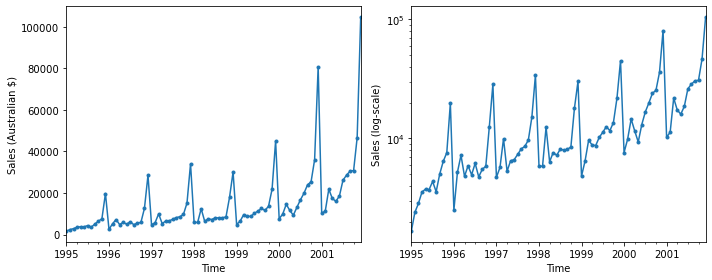

In [28]:
df = pd.read_csv(DATA / 'SouvenirSales.csv')
df_ts = pd.Series(df['Sales'].values, index=pd.to_datetime(df.Date, format='%b-%y'), name='Sales')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
for ax in axes:
    df_ts.plot(ax=ax, y=['Sales'], style='.-')
    ax.set_xlabel('Time')
axes[1].set_yscale('log')
axes[0].set_ylabel('Sales (Australian $)')
axes[1].set_ylabel('Sales (log-scale)')
plt.tight_layout()
plt.show()

## Solution 17.6.a
Based on the two time plots, which predictors should be included in the regression model? What is the total number of predictors in the model?

12 predictors - the monthly index variable (trend), plus 11 seasonal variables 
(one for each month minus 1 - including all 12 would lead to multicollinearity
errors in the regression).


## Solution 17.6.b
Run a regression model with Sales (in Australian dollars) as the outcome variable, and with a linear trend and monthly seasonality. Remember to fit only the training data. Call this model A.

In [29]:
df = tsatools.add_trend(df_ts, trend='ct')
df['month'] = df.index.month

train_df = df[:'2000-12-31']
valid_df = df['2001-01-01':]

modelA = sm.ols(formula='Sales ~ trend + C(month)', data=train_df).fit()

### Solution 17.6.b.i
Examine the estimated coefficients: which month tends to have the highest average sales during the year? Why is this reasonable?

In [30]:
print(modelA.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     18.53
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           9.44e-16
Time:                        20:21:15   Log-Likelihood:                -720.48
No. Observations:                  72   AIC:                             1467.
Df Residuals:                      59   BIC:                             1497.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3065.5544   2640.262     -1.

December - this is the holiday season (and the height of the summer in Australia).

### Solution 17.6.b.ii
The estimated trend coefficient in model A is 245.36. What does this mean?

Seasonally adjusted sales increase by 240.1 Australian dollars per month

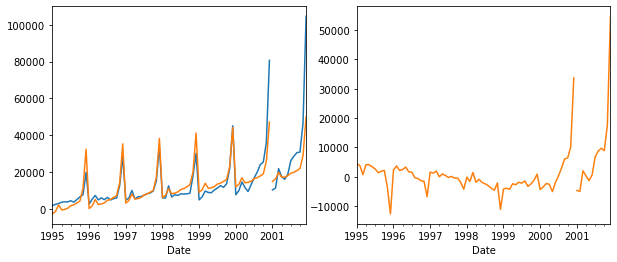

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
for sub_df in (train_df, valid_df):
    sub_df.Sales.plot(ax=axes[0], color='C0')
    modelA.predict(sub_df).plot(ax=axes[0], color='C1')
    resid = sub_df.Sales - modelA.predict(sub_df)
    resid.plot(ax=axes[1], color='C1')
    
plt.show()

## Solution 17.6.c
Run a regression model with an exponential trend and multiplicative seasonality.
Remember to fit only the training data. Call this model B.

In [32]:
modelB = sm.ols(formula='np.log(Sales) ~ trend + C(month)', data=train_df).fit()
print(modelB.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(Sales)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     80.40
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           6.21e-32
Time:                        20:21:16   Log-Likelihood:                 25.021
No. Observations:                  72   AIC:                            -24.04
Df Residuals:                      59   BIC:                             5.554
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.6464      0.084     90.

### Solution 17.6.c.i
Fitting a model to log(Sales) with a linear trend is equivalent to fitting a model to Sales (in dollars) with what type of trend?

Exponential trend

### Solution 17.6.c.ii
The estimated trend coefficient in model B is 0.02. What does this mean?

Seasonally-adjusted sales increase by 2% per month on average.

### Solution 17.6.c.iii
Use this model to forecast the sales in February 2002.

In order to predict February 2002, we need to rebuild a model with the full dataset

In [33]:
modelBfull = sm.ols(formula='np.log(Sales) ~ trend + C(month)', data=df).fit()

future_df = pd.DataFrame({
    'const': [1.0, 1.0],
    'trend': [85.0, 86.0],
    'month': [1, 2],
}, index=['2002-01-01', '2002-02-01'])
np.exp(modelBfull.predict(future_df))

2002-01-01    13484.062109
2002-02-01    17724.450248
dtype: float64

## Solution 17.6.d
Compare the two regression models (A and B) in terms of forecast
performance. Which model is preferable for forecasting? Mention at least two
reasons based on the information in the outputs.

In [34]:
regressionSummary(valid_df['Sales'], modelA.predict(valid_df))
regressionSummary(valid_df['Sales'], np.exp(modelB.predict(valid_df)))


Regression statistics

                      Mean Error (ME) : 8251.5127
       Root Mean Squared Error (RMSE) : 17451.5469
            Mean Absolute Error (MAE) : 10055.2761
          Mean Percentage Error (MPE) : 10.5340
Mean Absolute Percentage Error (MAPE) : 26.6657

Regression statistics

                      Mean Error (ME) : 4824.4941
       Root Mean Squared Error (RMSE) : 7101.4442
            Mean Absolute Error (MAE) : 5191.6695
          Mean Percentage Error (MPE) : 12.3594
Mean Absolute Percentage Error (MAPE) : 15.5191


Fitting the natural log in model B damps the variability in the seasonal
component so it is additive. It can now be modeled by dummy variables. Also
the log makes the trend linear and suitable for linear regression. In model A
we fit a linear trend to data that had a nonlinear trend.

## Solution 17.6.e
Continuing with model B, 
create an ACF plot until lag 15 for the forecast errors. Now fit an AR model with lag 2 [ARIMA(2,0,0)]
to the forecast errors.

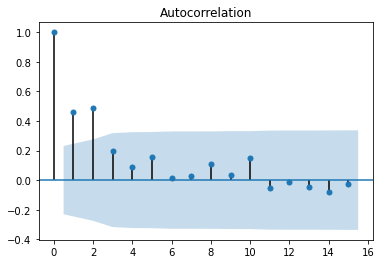

In [35]:
ax = tsaplots.plot_acf(modelB.resid, lags=15)
plt.show()

In [36]:
arimaB = ARIMA(modelBfull.resid, order=(2, 0, 0), freq='MS').fit(disp=0)
arimaB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   84
Model:                     ARMA(2, 0)   Log Likelihood                  46.278
Method:                       css-mle   S.D. of innovations              0.139
Date:                Sun, 08 Mar 2020   AIC                            -84.556
Time:                        20:21:16   BIC                            -74.833
Sample:                    01-01-1995   HQIC                           -80.647
                         - 12-01-2001                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.044     -0.058      0.954      -0.089       0.084
ar.L1.y        0.3488      0.103      3.392      0.001       0.147       0.550
ar.L2.y        0.3182      0.103      3.089      0.002       0.116       0.520
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3074           +0.0000j            1.3074            0.0000
AR.2           -2.4034           +0.0000j            2.4034            0.5000
-----------------------------------------------------------------------------
"""

### Solution 17.6.e.i
Examining the ACF plot and the estimated coefficients of the
AR(2) model (and their statistical significance), what can we learn about the
forecasts that result from model B?

They should be adjusted to account for the autocorrelation at lags 1 and 2.

### Solution 17.6.e.i
Use the autocorrelation information to compute an improved
forecast for January 2002, using model B and the AR(2) model above.

In [37]:
forecast, _, conf_int = arimaB.forecast(1)
arimaCorrection = forecast[0]
arimaCorrection

0.06501310628340459

The untransformed prediction from `modelBfull` is

In [38]:
modelPrediction = modelBfull.predict(future_df)[0]
modelPrediction

9.50926368247093

We can combine the prediction and the correction

In [39]:
print('corrected prediction: ', modelPrediction + arimaCorrection)
print('predicted sales: ', np.exp(modelPrediction + arimaCorrection))

corrected prediction:  9.574276788754334
predicted sales:  14389.827160919325


## Solution 17.6.f
How would you model these data differently if the goal was to
understand the different components of sales in the souvenir shop between
1995--2001? Mention two differences.

No data partitioning.
Evaluate model on the basis of data fit, not forecast error.
Since Model B is the more accurate model we can go ahead and fit the model to
all of the data, then generate the residuals for all the data, then fit an 
ARIMA model to the residuals which will then be used to adjust the forecast.
We do not have a trend showing in the residuals since it has been taken out 
by the regression model. We have significant autocorrelation at lags 1 and 2, 
so we fit an ARIMA (2,0,0) to the residuals.

# Problem 17.7:  Shipments of Household Appliances
The time plot in the Figure shows the series of quarterly shipments (in million dollars) of US household appliances between 1985-1989 (data are available in _ApplianceShipments.csv_, data courtesy of Ken Black).

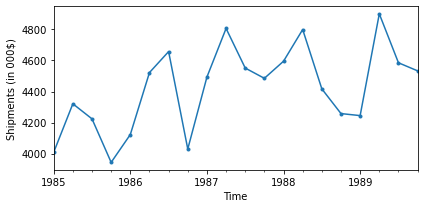

In [40]:
df = pd.read_csv(DATA / 'ApplianceShipments.csv')

# convert Quarter information into month-year
for q, m in ('Q1', '03'), ('Q2', '06'), ('Q3', '09'), ('Q4', '12'):
    df['Quarter'] = df['Quarter'].str.replace(q, m)
df['Quarter'] = pd.to_datetime(df.Quarter, format='%m-%Y')

df_ts = pd.Series(df['Shipments'].values, index=df.Quarter, name='shipments')
ax = df_ts.plot(style='.-', figsize=(6,3))
ax.set_ylabel('Shipments (in 000$)')
ax.set_xlabel('Time')
plt.tight_layout()
plt.show()

If we compute the autocorrelation of the series, which lag (> 0) is most likely to have the largest coefficient (in absolute value)? Create an ACF plot and compare with your answer.

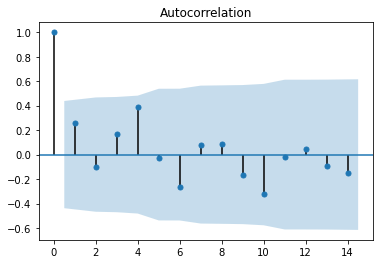

In [41]:
tsaplots.plot_acf(df.Shipments)
plt.show()

Our guess is that lag = 4 will have the greatest coefficient. Sales appear to 
be highly cyclical, meaning that the quarter most like the current quarter 
will be the year-ago quarter. This is confirmed by the ACF plot.

# Problem 17.8: Australian Wine Sales
The Figure shows time plots of monthly sales of six types of Australian wines  (red, rose, sweet white, dry white, sparkling, and fortified) for 1980--1994 (Data are available in _AustralianWines.csv_, source: Hyndman, R.J., Time Series Data Library, https://datamarket.com/data/list/?q=provider:tsdl. Accessed on 11/20/2018). The units are thousands of litres. You are hired to obtain short term forecasts (2-3 months ahead) for each of the six series, and this task will be repeated every month.

Note: This problem more properly pertains to chapter 18, where Holt-Winters is covered.

In [42]:
df = pd.read_csv(DATA / 'AustralianWines.csv', na_values=['*'])
df['Date'] = pd.to_datetime(df.Month, format='%b-%y')
df.head()

,Month,Fortified,Red,Rose,sparkling,Sweet white,Dry white,Date
0,Jan-80,2585,464,112.0,1686,85,1954,1980-01-01
1,Feb-80,3368,675,118.0,1591,89,2302,1980-02-01
2,Mar-80,3210,703,129.0,2304,109,3054,1980-03-01
3,Apr-80,3111,887,99.0,1712,95,2414,1980-04-01
4,May-80,3756,1139,116.0,1471,91,2226,1980-05-01


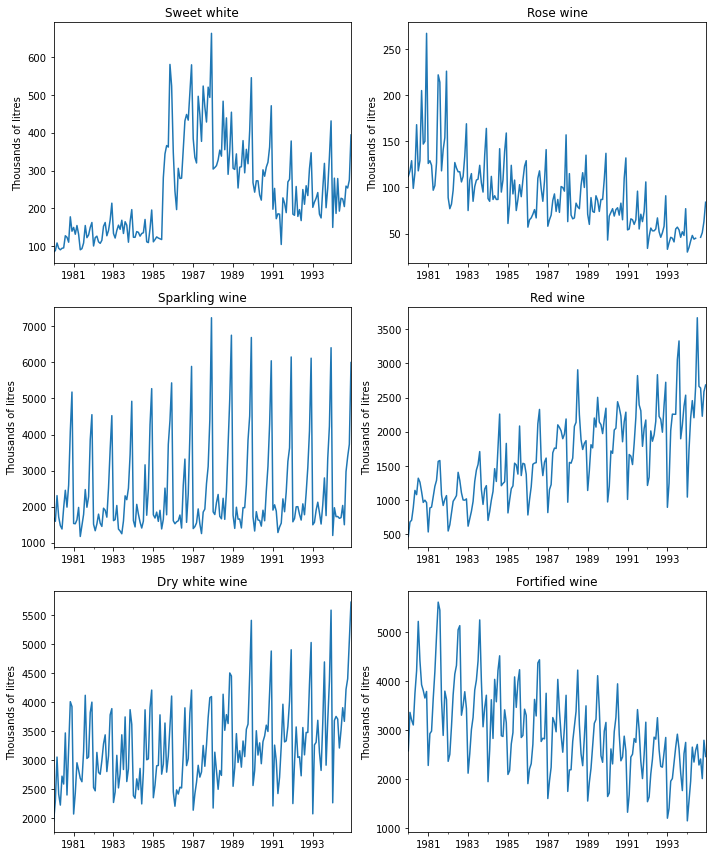

In [43]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,12))
params = [
    {'ax': axes[0, 0], 'title': 'Sweet white', 'y': 'Sweet white'},
    {'ax': axes[0, 1], 'title': 'Rose wine', 'y': 'Rose'},
    {'ax': axes[1, 0], 'title': 'Sparkling wine', 'y': 'sparkling'},
    {'ax': axes[1, 1], 'title': 'Red wine', 'y': 'Red'},
    {'ax': axes[2, 0], 'title': 'Dry white wine', 'y': 'Dry white'},
    {'ax': axes[2, 1], 'title': 'Fortified wine', 'y': 'Fortified'},
]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    for param in params:
        ax = df.plot(x='Date', **param)
        ax.set_xlabel('')
        ax.set_ylabel('Thousands of litres')
        ax.get_legend().remove()
plt.tight_layout()
plt.show()

## Solution 17.8.a
Which forecasting method would you choose if you had to choose the same method for all series? Why?

Model/Method: Holt-Winter's exponential smoothing
Reasons:
1. Ability of the model to capture both seasonality and trend that are present in the various data series.
2. Adaptability of the model - will adapt to the various patterns of different data series
3. Holt-Winter's model is a reasonable model for all series - it will be able to capture and adjust to changing levels of trends and seasonality swings. It is parsimonious and should produce good fit as well as good forecasts


## Solution 17.8.b
Fortified wine has the largest market share of the above six types of wine. You are asked to focus on fortified wine sales alone, and produce as accurate as possible forecasts for the next 2 months.  

- Start by partitioning the data: use the period until December 1993 as the training set.
- Fit a regression model to sales with a linear trend and additive seasonality.

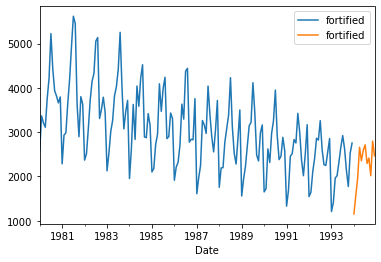

In [44]:
df = pd.read_csv(DATA / 'AustralianWines.csv', na_values=['*'])
df['Date'] = pd.to_datetime(df.Month, format='%b-%y')

df = tsatools.add_trend(pd.Series(df['Fortified'].values, index=df.Date, name='fortified'), trend='ct')
df['month'] = df.index.month

train_df = df[:'1993-12-31']
valid_df = df['1994-01-01':]
ax = train_df.plot(y=['fortified'])
valid_df.plot(y=['fortified'], ax=ax)
plt.show()
# df.head()

In [45]:
model = sm.ols(formula='fortified ~ trend + C(month)', data=train_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              fortified   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     105.6
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           4.09e-68
Time:                        20:21:18   Log-Likelihood:                -1188.7
No. Observations:                 168   AIC:                             2403.
Df Residuals:                     155   BIC:                             2444.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2679.6545     88.043     30.

### Solution 17.8.b.i
Create the 'actual vs. forecast' plot. What can you say about the model fit?

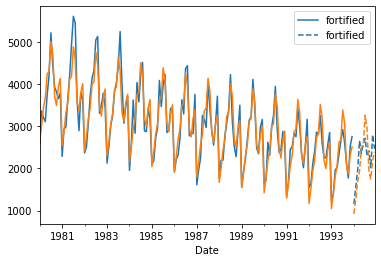

In [46]:
# train_df = df[:'1993-12-31']
# valid_df = df['1994-01-01':]
ax = train_df.plot(y=['fortified'], color='C0')
valid_df.plot(y=['fortified'], ax=ax, color='C0', linestyle='dashed')
model.predict(train_df).plot(y=['fortified'], ax=ax, color='C1')
model.predict(valid_df).plot(y=['fortified'], ax=ax, color='C1', linestyle='dashed')

plt.show()

### Solution 17.8.b.ii
Use the regression model to forecast sales in January and February 1994.

In [47]:
model.predict(valid_df)[:2]

Date
1994-01-01     918.881868
1994-02-01    1269.596154
dtype: float64

## Solution 17.8.c
Create an ACF plot for the residuals from the above model until lag 12. 

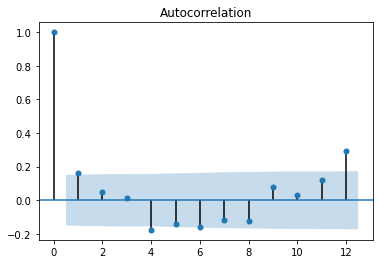

In [48]:
tsaplots.plot_acf(model.resid, lags=12)
plt.show()

Examining this plot (only), which of the following statements are reasonable conclusions?

- Decembers (month 12) are not captured well by the model.
- There is a strong correlation between sales on the same calendar month.
- The model does not capture the seasonality well.
- We should try to fit an autoregressive model with lag 12 to the residuals.



- Decembers (month 12) are not captured well by the model - NO (don't forget, the "12" in the ACF plot refers to lag of 12 months, not to December!)
- There is a strong correlation between sales on the same calendar month - YES (this is what the high coefficient for lag 12 means
- The model does not capture the seasonality well - YES (this follows from the above)
- We should try to fit an autoregressive model with lag 12 to the residuals - YES
